In [443]:
import gym_duckietown
import cv2
import matplotlib.pyplot as plt
import numpy as np

from gym_duckietown.simulator import Simulator

from scipy import spatial

import utils

In [444]:
#gym_duckietown is very chatty
import logging
gym_duckietown.logger.setLevel(logging.WARNING)

In [445]:
plt.rcParams['figure.figsize'] = [7, 7]

In [446]:
env = Simulator("ETU_autolab_track",
    full_transparency=True,
    domain_rand=False,
    seed=42,
    max_steps=float("inf"),
)

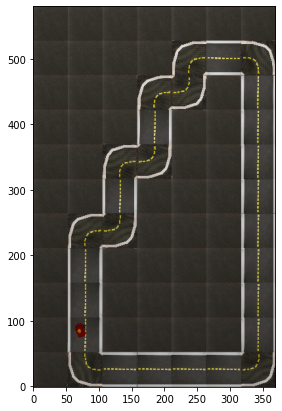

In [447]:
top_view = utils.get_top_view(env)
plt.imshow(top_view, origin="lower")

In [448]:
img_hsv = cv2.cvtColor(top_view, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(top_view, cv2.COLOR_RGB2GRAY)

lower_yellow = np.array([20,100,150])
upper_yellow = np.array([30,255,255])

mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
mask = cv2.bitwise_and(gray, mask_yellow)

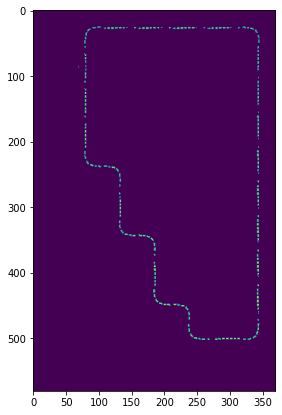

In [449]:
plt.imshow(mask)

In [450]:
low_threshold = 89
high_threshold = 80
edges = cv2.Canny(mask, low_threshold, high_threshold)

rho = 2  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 3  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10  # minimum number of pixels making up a line
max_line_gap = 10  # maximum gap in pixels between connectable line segments

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

_points = lines.reshape(-1, 2)

x, y = _points.T
x, y = utils.image_to_tile_coordinates(x, y, env)

In [451]:
points = np.array([x, y]).T
tree = spatial.KDTree(points)
point = points[0]
pts = points[1:]
sortedxy = [point]
for i in range(len(x)-1):
    tree = spatial.KDTree(pts)
    dist, idx = tree.query([*point], k=1)
    point = pts[idx]
    pts = np.delete(pts, idx, 0)
    sortedxy.append(point)

In [452]:
x_srt, y_srt = np.array(sortedxy).T

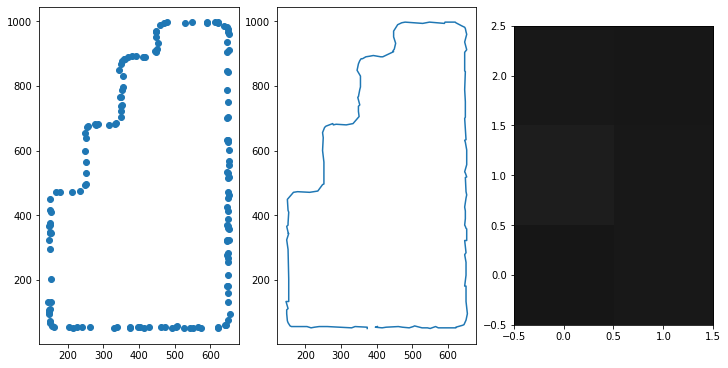

In [453]:
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
ax_dict = fig.subplot_mosaic("ABC")
ax_dict["A"].scatter(x_srt,y_srt)
ax_dict["B"].plot(x_srt,y_srt)
ax_dict["C"].plot(x_srt,y_srt)
utils.show_on_map_array(env, np.array([x_srt,y_srt]).T, fig=ax_dict["C"])

In [454]:
_points

array([[212,  28],
       [243,  28],
       [146, 344],
       [176, 344],
       [219,  26],
       [259,  26],
       [342, 492],
       [342, 425],
       [183, 385],
       [187, 418],
       [343, 487],
       [343, 319],
       [114,  26],
       [179,  28],
       [177, 345],
       [185, 355],
       [286,  26],
       [298,  28],
       [341, 140],
       [343,  38],
       [217, 448],
       [235, 457],
       [ 94, 238],
       [124, 239],
       [220, 448],
       [236, 456],
       [ 79, 226],
       [ 79,  37],
       [341, 352],
       [341, 318],
       [131, 302],
       [131, 249],
       [341, 269],
       [344, 303],
       [108,  28],
       [126,  28],
       [ 80, 209],
       [ 81, 173],
       [184, 437],
       [195, 448],
       [342, 208],
       [344, 233],
       [341, 471],
       [341, 494],
       [184, 371],
       [187, 401],
       [248, 501],
       [328, 501],
       [341, 214],
       [344, 261],
       [133, 250],
       [133, 267],
       [265,